This notebook is inteded to work with the Harris Co. TX property value data provided on the Harris County Apprasal District's website. https://hcad.org/pdata/pdata-property-downloads.html#

In [1]:
#import needed modules initial list based on Springboard's guided capstone Data Wrangling notebook... will add or remove based on actual usage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#may want to add something to save files later... the version in the guided capstone used a custom import

In [2]:
#import data files. I initially had to resave these files with encoding as UTF-8 due to a parsing error. Using Sublime Text it 
#seems to be Western (Windows 1252) trying cp1252 seems to have fixed the issue
real_acct = pd.read_csv('../spds_Capstone_2/HCAD_Data/real_acct.txt', sep='\t', encoding='cp1252')

C:\Users\thege\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,21,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
real_acct.head(1)

,acct,yr,mailto,mail_addr_1,mail_addr_2,mail_city,mail_state,mail_zip,mail_country,undeliverable,...,protested,certified_date,rev_dt,rev_by,new_own_dt,lgl_1,lgl_2,lgl_3,lgl_4,jurs
0,10010000013,2020,CITY OF HOUSTON,PO BOX 1562,,HOUSTON,TX,77251-1562,,N,...,N,08/21/2020,01/01/2016,01391,01/02/1988,ALL BLK 1,SSBB,NaN,NaN,001 040 041 042 043 044 048 061 265 268 576


In [4]:
real_acct.shape

(1490935, 71)

In [5]:
#This is unwieldy right now... I'm going to strip out some of the address, date, and description columns since they will not be used in analysis
reduced_acct = real_acct.drop(['yr','mailto','mail_addr_1','mail_addr_2','mail_city','mail_state','mail_zip','mail_country','undeliverable','str_pfx','str_num','str_num_sfx','str','str_sfx','str_sfx_dir','str_unit','site_addr_1','site_addr_2','site_addr_3','map_facet','key_map','Market_Area_1_Dscr','Market_Area_2_Dscr','splt_dt','nxt_bld','noticed','notice_dt','certified_date','rev_dt','rev_by','new_own_dt'],axis=1)

In [6]:
reduced_acct.dtypes

acct                      int64
state_class              object
school_dist              object
Neighborhood_Code       float64
Neighborhood_Grp          int64
Market_Area_1            object
Market_Area_2            object
econ_area                object
econ_bld_class           object
center_code              object
yr_impr                  object
yr_annexed               object
dsc_cd                   object
bld_ar                    int64
land_ar                   int64
acreage                 float64
Cap_acct                 object
shared_cad               object
land_val                float64
bld_val                 float64
x_features_val          float64
ag_val                  float64
assessed_val            float64
tot_appr_val            float64
tot_mkt_val             float64
prior_land_val          float64
prior_bld_val           float64
prior_x_features_val    float64
prior_ag_val            float64
prior_tot_appr_val      float64
prior_tot_mkt_val       float64
new_cons

It seems like there are a lot of categorical columns in this dataset. 

In [7]:
#I'd like to use the account number as the index. I should check to make sure there are not any repeated values.
reduced_acct.duplicated(subset=['acct']).sum()

0

In [8]:
#setting the account as the index
reduced_acct.set_index('acct')

,state_class,school_dist,Neighborhood_Code,Neighborhood_Grp,Market_Area_1,Market_Area_2,econ_area,econ_bld_class,center_code,yr_impr,...,prior_tot_mkt_val,new_construction_val,tot_rcn_val,value_status,protested,lgl_1,lgl_2,lgl_3,lgl_4,jurs
acct,,,,,,,,,,,,,,,,,,,,,
10010000013,X1,01,5900.05,0,4001,4001,1,E,28,,...,0.0,0.0,0.0,"Value Unchanged, Notice Not Required",N,ALL BLK 1,SSBB,NaN,NaN,001 040 041 042 043 044 048 061 265 268 576
10020000001,F1,01,5900.05,0,5001,4001,1,E,28,,...,280000.0,0.0,0.0,Noticed,Y,TR 15 BLK 2,SSBB,NaN,NaN,001 040 041 042 043 044 048 061 265 268 576
10020000003,F1,01,5900.05,0,4001,4001,1,E,33,,...,885886.0,0.0,0.0,Noticed,Y,.500 U/D INT IN TR 14 BLK 2,SSBB,NaN,NaN,001 040 041 042 043 044 048 061 265 268 576
10020000004,F1,01,5900.05,0,4001,4001,1,E,33,,...,442943.0,0.0,0.0,Noticed,Y,.25 U/D INT IN TR 14 BLK 2,SSBB,NaN,NaN,001 040 041 042 043 044 048 061 265 268 576
10020000013,X1,01,5900.05,0,4001,4001,1,E,28,,...,0.0,0.0,0.0,"Value Unchanged, Notice Not Required",N,TR 13 BLK 2,SSBB,NaN,NaN,001 040 041 042 043 044 048 061 265 268 576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700000000235,F2,,9001.00,0,4027,360,,E,IX,,...,301980.0,0.0,0.0,Noticed,N,TRS 2 2A 2C 3 4B 9 & PT TR 4,TRS 1 & 3D ABST 78 W VINCE,ABST 698 J SEYMOUR,NaN,074
9700000000237,J3,,9000.00,0,,200,10,E,UT,,...,179080.0,0.0,0.0,Noticed,Y,IMPROVEMENTS ONLY PORTION OF,SAM BERTRON POWER PLANT ANNEX-,ED BY CITY OF LA PORTE,(SUB STATION),071
9700000000239,F2,,9701.00,0,4027,350,10,,IX,,...,931270.0,0.0,0.0,Noticed,N,TRS 4A-1 & 4A-2 (IMPS ONLY),(LAND*SEE SCREEN 33) & TRS 2C,THRU 2H ABST 29 W P HARRIS,PERRY,071


In [9]:
#The state class column is the type of real estate. I wonder what the breakdown is.
reduced_acct['state_class'].value_counts().head()

A1    1061549
X1      69639
F1      64122
C1      55652
C3      36814
Name: state_class, dtype: int64

Based on the State Class descriptions A1 = Real, Residential, Single-Family. X1 = Other Exempt (Government). F1 = Real, Commercial. C1 = Real, Vacant Lots/Tracts (In City). C3 = Real, Vacant Lots/Tracts (Not in City).

In [10]:
state_classes = ['A1','X1','F1','C1','C3']

In [11]:
#lets take a closer look at these top 5
protest_by_class = []
for c in state_classes:
    c_acct = reduced_acct[reduced_acct['state_class'] == c]
    num_c_acct = len(c_acct['state_class']==c)
    c_prot = c_acct[c_acct['protested']=='Y']
    num_c_prot = len(c_prot['protested']=='Y')
    protest_by_class.append([c,num_c_acct,num_c_prot])

In [12]:
for a,b,c in protest_by_class:
    print(str(a)+' had '+str(b)+' records with '+str(c)+' protests that is '+str(round(c/b*100,2))+'%')

A1 had 1061549 records with 291120 protests that is 27.42%
X1 had 69639 records with 196 protests that is 0.28%
F1 had 64122 records with 42610 protests that is 66.45%
C1 had 55652 records with 13855 protests that is 24.9%
C3 had 36814 records with 7257 protests that is 19.71%


It seems like single family residences make up over 2/3 of the records but only 27% were protested.

In [13]:
#lets take a closer look at the rest of the columns to see what is missing
acct_missing = pd.concat([real_acct.isnull().sum(), 100 * real_acct.isnull().mean()], axis=1)
acct_missing.columns=['count', '%']
acct_missing[acct_missing['count']>0].sort_values(by='count',ascending=False)

,count,%
lgl_4,1433065,96.118543
lgl_3,1252016,83.975224
rev_dt,28019,1.879291
prior_land_val,21928,1.470755
prior_tot_mkt_val,21928,1.470755
prior_tot_appr_val,21928,1.470755
prior_x_features_val,21928,1.470755
prior_bld_val,21928,1.470755
prior_ag_val,21928,1.470755
tot_rcn_val,3511,0.235490


It looks like there are a bunch of missing values for the legal description 3 and 4 columns, this is not a shock since these are added lines if they exceed the space available in the first 2 columns. Columns with "prior" as the lead to the column name are the new properties built or split from the prior year. I don't think I am intrested in these 21928 new properties or the 483 without a value. 

In [14]:
#drop the rows that indicate new accounts or are missing a value
reduced_acct.dropna(subset=['prior_land_val','tot_mkt_val'],inplace=True)

In [15]:
#checking that the offending rows are now gone.
acct_missing2 = pd.concat([reduced_acct.isnull().sum(), 100 * reduced_acct.isnull().mean()], axis=1)
acct_missing2.columns=['count', '%']
acct_missing2[acct_missing2['count']>0].sort_values(by='count',ascending=False)

,count,%
lgl_4,1415316,96.359972
lgl_3,1237232,84.235352
tot_rcn_val,3002,0.204387
lgl_2,158,0.010757


I don't think I will need these columns, but I am not going to drop them yet. 
I am also going to need the hearing data and information about the building. Starting with the hearings.

In [16]:
#Setting up to drop the lgl discription columns which are going to be all unique
#reduced_acct = reduced_acct.drop(['lgl_1','lgl_2','lgl_3','lgl_4'],axis=1,inplace=True)

In [17]:
real_hearing = pd.read_csv('../spds_Capstone_2/HCAD_Data/arb_hearings_real.txt', sep='\t', encoding='cp1252')

In [18]:
real_hearing.shape

(417508, 15)

In [19]:
real_hearing.head()

,acct,Tax_Year,Real_Personal_Property,Hearing_Type,State_Class_Code,Owner_Name,Scheduled_for_Date,Actual_Hearing_Date,Release_Date,Letter_Type,Agent_Code,Initial_Appraised_Value,Initial_Market_Value,Final_Appraised_Value,Final_Market_Value
0,10020000001,2020,R,F,F1,CURRENT OWNER,04/15/2020,12/08/2020,01/15/2021,TN,Agent,307673.0,307673.0,307673.0,307673.0
1,10020000016,2020,R,F,F1,901 COMMERCE LLC,04/15/2020,10/01/2020,10/16/2020,FC,Agent,1002002.0,1002002.0,905202.0,905202.0
2,10070000013,2020,R,I,F1,BLOCK 7 SSBB LP,07/09/2020,NaN,09/18/2020,NN,Owner,2397533.0,2397533.0,2397533.0,2397533.0
3,10070000014,2020,R,I,F1,BLOCK 7 SSBB LP,07/17/2020,NaN,10/16/2020,NN,Owner,541634.0,541634.0,541634.0,541634.0
4,10080000002,2020,R,I,C2,CENTERPOINT ENERGY ENTEX,01/01/1900,NaN,08/14/2020,IN,Owner,1080300.0,1080300.0,1080300.0,1080300.0


In [20]:
real_hearing.set_index('acct')

,Tax_Year,Real_Personal_Property,Hearing_Type,State_Class_Code,Owner_Name,Scheduled_for_Date,Actual_Hearing_Date,Release_Date,Letter_Type,Agent_Code,Initial_Appraised_Value,Initial_Market_Value,Final_Appraised_Value,Final_Market_Value
acct,,,,,,,,,,,,,,
10020000001,2020,R,F,F1,CURRENT OWNER,04/15/2020,12/08/2020,01/15/2021,TN,Agent,307673.0,307673.0,307673.0,307673.0
10020000016,2020,R,F,F1,901 COMMERCE LLC,04/15/2020,10/01/2020,10/16/2020,FC,Agent,1002002.0,1002002.0,905202.0,905202.0
10070000013,2020,R,I,F1,BLOCK 7 SSBB LP,07/09/2020,NaN,09/18/2020,NN,Owner,2397533.0,2397533.0,2397533.0,2397533.0
10070000014,2020,R,I,F1,BLOCK 7 SSBB LP,07/17/2020,NaN,10/16/2020,NN,Owner,541634.0,541634.0,541634.0,541634.0
10080000002,2020,R,I,C2,CENTERPOINT ENERGY ENTEX,01/01/1900,NaN,08/14/2020,IN,Owner,1080300.0,1080300.0,1080300.0,1080300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700000000230,2020,R,I,F2,EQUISTAR CHEMICALS LP,06/30/2020,06/30/2020,07/02/2020,PT,Owner,44550333.0,44550333.0,44550333.0,44550333.0
9700000000233,2020,R,I,F2,PASADENA REFINING SYSTEM INC,07/15/2020,07/14/2020,07/17/2020,IC,Owner,26542493.0,26542493.0,22393285.0,22393285.0
9700000000237,2020,R,I,J3,CENTERPOINT ENERGY HOU ELE,01/01/1900,NaN,08/14/2020,IN,Owner,179080.0,179080.0,179080.0,179080.0


In [21]:
#lets see what is missing in this table
acct_missing3 = pd.concat([real_hearing.isnull().sum(), 100 * real_hearing.isnull().mean()], axis=1)
acct_missing3.columns=['count', '%']
acct_missing3[acct_missing3['count']>0].sort_values(by='count',ascending=False)

,count,%
Actual_Hearing_Date,193162,46.265461
Scheduled_for_Date,21934,5.253552
Release_Date,467,0.111854
Final_Appraised_Value,289,0.069220
Final_Market_Value,289,0.069220
Letter_Type,161,0.038562
Initial_Appraised_Value,9,0.002156
Initial_Market_Value,9,0.002156


In [22]:
#I don't believe that the columns for hearing dates are going to be material, so I am going to drop them. 
#Rows that are missing initial and final values are also not of use for this study.
r_hearings = real_hearing.drop(['Actual_Hearing_Date','Scheduled_for_Date','Release_Date','Letter_Type'], axis=1)
r_hearings.dropna(subset=['Final_Appraised_Value','Initial_Appraised_Value'],inplace=True)

In [23]:
#confirm the above removed the missing data
acct_missing4 = pd.concat([r_hearings.isnull().sum(), 100 * r_hearings.isnull().mean()], axis=1)
acct_missing4.columns=['count', '%']
acct_missing4.sort_values(by='count',ascending=False).head()

,count,%
acct,0,0.0
Tax_Year,0,0.0
Real_Personal_Property,0,0.0
Hearing_Type,0,0.0
State_Class_Code,0,0.0


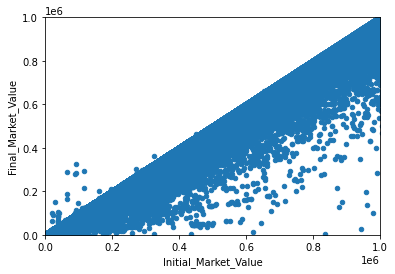

In [24]:
r_hearings.plot(kind='scatter',x='Initial_Market_Value',y='Final_Market_Value',xlim=(0,1000000),ylim=(0,1000000))
plt.show()

While many property owners are successful in their appeal it looks like there are some unlucky property owners who saw their value go up!

In [25]:
#take a look at the breakdown of hearings by State Class
r_hearings['State_Class_Code'].value_counts()

A1      310556
F1       41782
O1       12940
C2       12491
C1       12410
C3        5755
B1        4632
O2        3899
B2        3427
M3        1870
J3        1834
F2        1711
A2         975
D1         949
D2         873
XV         362
B3         252
E1         154
B4         108
J4          85
J2          40
J1          39
XE          29
J6          16
J5           8
XJ           7
XL           5
XU           1
XG           1
Name: State_Class_Code, dtype: int64

In [26]:
#I'm going to limit both of these datasets to just the single family residences (state_code = A1)
hearing_classes = r_hearings['State_Class_Code'].unique()
sfh_hearings = r_hearings[r_hearings['State_Class_Code']==hearing_classes[4]]
sfh_acct = reduced_acct[reduced_acct['state_class']=='A1']

In [27]:
#joining the two data tables together, inner should be fine since there should not be any hearings that don't have an account with them
sfh_full = sfh_acct.join(sfh_hearings.set_index('acct'),on='acct',how='left')

In [28]:
sfh_full.tail(10)

,acct,state_class,school_dist,Neighborhood_Code,Neighborhood_Grp,Market_Area_1,Market_Area_2,econ_area,econ_bld_class,center_code,...,Tax_Year,Real_Personal_Property,Hearing_Type,State_Class_Code,Owner_Name,Agent_Code,Initial_Appraised_Value,Initial_Market_Value,Final_Appraised_Value,Final_Market_Value
1461618,1936507000004,A1,08,671.00,8013,270,270,,,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461619,1936507000005,A1,08,671.00,8013,270,270,,,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461620,1936507000016,A1,08,671.00,8013,270,270,,,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461621,1936507000017,A1,08,671.00,8013,270,270,,,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461623,1938003804012,A1,01,7530.06,1276,121,121,,,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461624,1938003804013,A1,01,7530.06,1276,121,121,,,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461625,1938003804014,A1,01,7530.06,1276,121,121,,,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461627,1953050320690,A1,08,688.03,8033,270,270,,,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461628,1953080320060,A1,08,688.03,8033,270,270,,,90,...,2020.0,R,F,A1,SFR-HOU I LLC,Agent,161093.0,161093.0,161093.0,161093.0
1461629,1955020050280,A1,08,688.01,8031,270,270,,,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like they merged successfully and there are no missing acct values

In [29]:
#based on descriptive stats ag_val, and Tax_Year are static for this dataset.
sfh_full.drop(['ag_val','Tax_Year'],axis=1,inplace=True)

In [30]:
#What is the distribution of data like for this dataset?
sfh_full.describe().T

,count,mean,std,min,25%,50%,75%,max
acct,1059015.0,1.024044e+12,2.799016e+11,1.120000e+10,8.542200e+11,1.122940e+12,1.223630e+12,1.955020e+12
Neighborhood_Code,1059015.0,3.543301e+03,2.974169e+03,1.000000e+00,1.162000e+03,2.496000e+03,7.160000e+03,9.684010e+03
Neighborhood_Grp,1059015.0,1.097238e+04,9.145997e+03,0.000000e+00,1.661000e+03,8.028000e+03,1.901600e+04,3.129900e+04
bld_ar,1059015.0,2.161789e+03,1.006083e+03,0.000000e+00,1.497000e+03,1.949000e+03,2.584000e+03,4.308000e+04
land_ar,1059015.0,1.169535e+04,2.022768e+06,0.000000e+00,5.878000e+03,7.236000e+03,9.240000e+03,2.081515e+09
acreage,1059015.0,2.684881e-01,4.643637e+01,0.000000e+00,1.349000e-01,1.661000e-01,2.121000e-01,4.778500e+04
land_val,1059015.0,8.876257e+04,2.004128e+05,0.000000e+00,2.884100e+04,3.839900e+04,6.365000e+04,1.888634e+07
bld_val,1059015.0,1.747076e+05,1.634847e+05,0.000000e+00,1.014120e+05,1.450500e+05,2.016340e+05,8.977027e+06
x_features_val,1059015.0,1.492434e+03,5.062576e+03,-7.991000e+04,0.000000e+00,0.000000e+00,7.560000e+02,5.906120e+05
assessed_val,1059015.0,2.649625e+05,3.206167e+05,1.000000e+02,1.442000e+05,1.930920e+05,2.764700e+05,2.476058e+07


In [31]:
#I wonder what the breakdown is for self representation
sfh_full['Agent_Code'].value_counts()

Owner     187094
Agent      98289
Name: Agent_Code, dtype: int64

In [32]:
sfh_full['appeal_reduction'] = sfh_full['Initial_Market_Value']-sfh_full['Final_Market_Value']
sfh_full['appeal_red_pct'] = (sfh_full['Initial_Market_Value']-sfh_full['Final_Market_Value'])/sfh_full['Initial_Market_Value']*100

In [33]:
sfh_full['appeal_reduction'].describe().T

count    2.853830e+05
mean     2.358010e+04
std      5.914434e+04
min     -4.311890e+05
25%      2.152000e+03
50%      1.192100e+04
75%      2.501900e+04
max      4.825610e+06
Name: appeal_reduction, dtype: float64

These negative reductions look suspicious. I'm going to try to dig in.

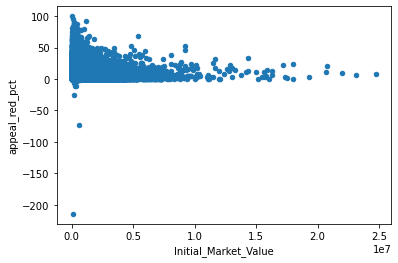

In [34]:
sfh_full.plot(kind='scatter',x='Initial_Market_Value',y='appeal_red_pct')
plt.show()

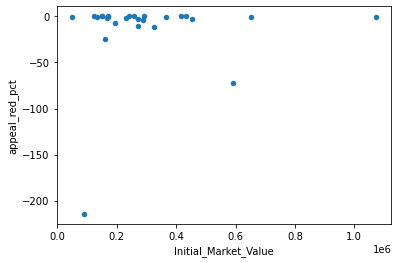

In [35]:
#focus on the negative values
sfh_full[sfh_full['appeal_red_pct']<0].plot(kind='scatter',x='Initial_Market_Value',y='appeal_red_pct')
plt.show()

In [36]:
#double check there are no final market values at or below 0
sfh_full[sfh_full['Final_Market_Value']<=0]

,acct,state_class,school_dist,Neighborhood_Code,Neighborhood_Grp,Market_Area_1,Market_Area_2,econ_area,econ_bld_class,center_code,...,Hearing_Type,State_Class_Code,Owner_Name,Agent_Code,Initial_Appraised_Value,Initial_Market_Value,Final_Appraised_Value,Final_Market_Value,appeal_reduction,appeal_red_pct


In [37]:
agent_perform = sfh_full.groupby('Agent_Code')['appeal_red_pct'].mean()

In [38]:
agent_perform

Agent_Code
Agent     4.721662
Owner     6.477101
Name: appeal_red_pct, dtype: float64

It looks like based on the full dataset owners performed better than Agents. I intend to look closer at this performance later.

In [39]:
#I need a list of accounts for single familly homes to work with fixtures
sfh_accts = []
sfh_accts = sfh_full['acct'].to_list()

In [40]:
#now to load the fixtures (this is the details about the buildings)
fixtures = pd.read_csv('../spds_Capstone_2/HCAD_Data/fixtures.txt', sep='\t', encoding='cp1252')

In [41]:
fixtures.head()

,acct,bld_num,type,type_dscr,units
0,10020000016,1,INT,Interior Finish Percent,100.0
1,10020000016,1,EL3,Elev: Hydro / Frght,1.0
2,10020000016,1,WHT,Wall Height,12.0
3,10040000001,1,OD2,OH Door: Roll Steel,2.0
4,10040000001,1,INT,Interior Finish Percent,100.0


It looks like acct can't be the index hear... there are more than one entry per account

In [42]:
#Check to see if any data is missing
fix_missing = pd.concat([fixtures.isnull().sum(), 100 * fixtures.isnull().mean()], axis=1)
fix_missing.columns=['count', '%']
fix_missing.sort_values(by='count',ascending=False).head()

,count,%
acct,0,0.0
bld_num,0,0.0
type,0,0.0
type_dscr,0,0.0
units,0,0.0


In [43]:
fixtures.shape

(8661675, 5)

In [44]:
fix_acct = fixtures[fixtures['acct'].isin(sfh_accts)]

In [45]:
fix_acct.head(10)

,acct,bld_num,type,type_dscr,units
750,11200000014,1,RMB,Room: Bedroom,4.0
751,11200000014,1,RMF,Room: Full Bath,2.0
752,11200000014,1,FPW,Fireplace: Masonry Firebrick,1.0
753,11200000014,1,FXT,Fixtures: Total,8.0
754,11200000014,1,RMT,Room: Total,8.0
755,11200000014,1,STY,Story Height Index,2.0
1750,20720000014,1,FXA,Fixtures: Addl,2.0
1751,20720000014,1,RMF,Room: Full Bath,3.0
1752,20720000014,1,RMT,Room: Total,6.0
1753,20720000014,1,RMH,Room: Half Bath,1.0


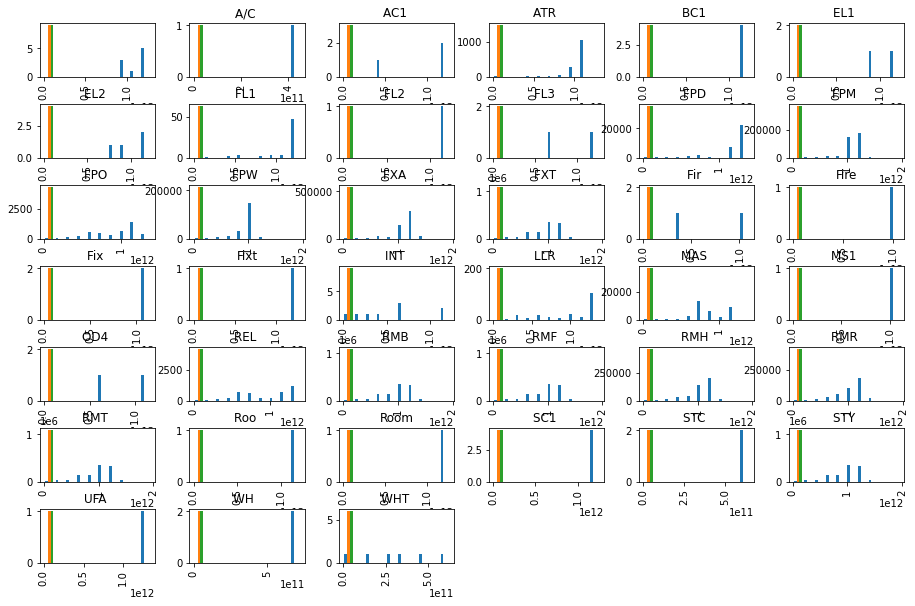

In [46]:
#creating subplots like we did in the guided capstone
fix_acct.hist(figsize=(15,10),by='type')
plt.subplots_adjust(hspace=0.5);

In [47]:
fix_acct['type'].value_counts()

RMB     1082753
STY     1082625
RMF     1082568
RMT     1082555
FXT     1082368
FXA      543392
RMH      457667
RMR      418081
FPM      365420
FPW      212833
MAS       37130
FPD       34732
FPO        4325
REL        4146
ATR        1463
LLR         199
FL1          63
INT           9
              9
WHT           6
BC1           4
EL2           4
SC1           4
AC1           3
FL3           2
WH            2
STC           2
EL1           2
Fix           2
Fir           2
OD4           2
Roo           1
Fixt          1
MS1           1
UFA           1
FL2           1
A/C           1
Room          1
Fire          1
Name: type, dtype: int64

This dataset seems to have several indicator (boolean) values. I know I will need these, but I am not sure how to use this data at this point.

In [48]:
fix_acct.describe().T

,count,mean,std,min,25%,50%,75%,max
acct,7492381.0,1.038490e+12,2.772446e+11,1.120000e+10,9.046500e+11,1.141430e+12,1.230500e+12,1.955020e+12
bld_num,7492381.0,1.029942e+00,4.765063e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.240000e+02
units,7492381.0,3.847056e+00,4.407307e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,2.938000e+03


In [49]:
#I wonder if I can build a table where I pivot so that account can be the index
fix_pivot = pd.pivot_table(fix_acct, values='units',index=['acct'],columns=['type'],aggfunc=sum,fill_value=0)
fix_pivot.head()

type,,A/C,AC1,ATR,BC1,EL1,EL2,FL1,FL2,FL3,...,RMR,RMT,Roo,Room,SC1,STC,STY,UFA,WH,WHT
acct,,,,,,,,,,,,,,,,,,,,,
11200000014,0,0,0,0,0,0,0,0,0,0,...,0,8,0,0,0,0,2.0,0,0,0
20720000014,0,0,0,0,0,0,0,0,0,0,...,0,6,0,0,0,0,4.0,0,0,0
21440000001,0,0,0,0,0,0,0,0,0,0,...,1,8,0,0,0,0,2.0,0,0,0
21440000008,0,0,0,0,0,0,0,0,0,0,...,0,6,0,0,0,0,2.0,0,0,0
21480000002,0,0,0,0,0,0,0,0,0,0,...,0,6,0,0,0,0,1.0,0,0,0


In [50]:
fix_pivot.shape

(1058677, 39)

In [51]:
#joining the fixtures to the already joined hearings and account tables
sfh_full_desc = sfh_full.join(fix_pivot,on='acct',how='left')

In [52]:
sfh_full_desc.head()

,acct,state_class,school_dist,Neighborhood_Code,Neighborhood_Grp,Market_Area_1,Market_Area_2,econ_area,econ_bld_class,center_code,...,RMR,RMT,Roo,Room,SC1,STC,STY,UFA,WH,WHT
363,11200000014,A1,01,5900.07,0,4001,4001,1,,33,...,0.0,8.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
926,20720000014,A1,01,7116.01,1421,140,140,,,62,...,0.0,6.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
1082,21440000001,A1,01,8400.12,1301,130,130,,,61,...,1.0,8.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1085,21440000008,A1,01,8400.12,1301,130,130,,,61,...,0.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1122,21480000002,A1,01,8400.12,1301,130,130,,,61,...,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
#Check this final dataset to see what is missing
full_missing = pd.concat([sfh_full_desc.isnull().sum(), 100 * sfh_full_desc.isnull().mean()], axis=1)
full_missing.columns=['count', '%']
full_missing[full_missing['count']>50].sort_values(by='count',ascending=False).T

,lgl_4,lgl_3,Final_Market_Value,appeal_red_pct,Real_Personal_Property,Hearing_Type,State_Class_Code,Owner_Name,Agent_Code,Initial_Appraised_Value,...,FL2,Fire,FL3,FPD,FPM,FPW,FXA,FXT,Fir,WHT
count,1.055330e+06,1.001011e+06,773632.000000,773632.000000,773632.000000,773632.000000,773632.000000,773632.000000,773632.000000,773632.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
%,9.965204e+01,9.452283e+01,73.052034,73.052034,73.052034,73.052034,73.052034,73.052034,73.052034,73.052034,...,0.020585,0.020585,0.020585,0.020585,0.020585,0.020585,0.020585,0.020585,0.020585,0.020585


In [54]:
#write the combined files to the data folder
sfh_full_desc.to_csv('../spds_Capstone_2/HCAD_Data/sfh_full_desc.csv')